# Урок 7
## Линейная регрессия. Однофакторный дисперсионный анализ
### Домашнее задание

#### Задача 1

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):

`salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]`

Возьмём в качестве признака значение `salary`, а в качестве целевой переменной – `scoring`.
1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

**Решение**

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
plt.style.use('seaborn-whitegrid')

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

1. a) Найдём коэффициенты линейной регрессии с помощью формул для парной регрессии:
$$b_1 = \frac{\overline{yx}-\overline{y}\cdot\overline{x}}{\overline{x^2}-(\overline{x})^2},$$
$$b_0 = \overline{y} - b_1 \cdot \overline{x}.$$

In [3]:
b1 = ((salary * scoring).mean() - salary.mean() * scoring.mean()) / ((salary ** 2).mean() - salary.mean() ** 2)
b1

2.620538882402765

In [5]:
b0 = scoring.mean() - b1 * salary.mean()
b0

444.1773573243596

Получили модель регрессии:
$$scoring = 444.1774 + 2.62 \cdot salary$$

1. б) Теперь проделаем тоже самое, но уже используя метод наименьших квадратов.

In [19]:
df_scoring = pd.DataFrame(data=scoring, columns=['scoring'])
df_salary = pd.DataFrame(data=salary, columns=['salary'])

In [21]:
ones = np.ones((df_salary.shape[0], 1))
df_features = np.hstack((ones, df_salary))

In [22]:
XTX = df_features.T.dot(df_features)
np.linalg.det(XTX)

349464.00000000023

In [23]:
XTX

array([[1.00000e+01, 1.01400e+03],
       [1.01400e+03, 1.37766e+05]])

In [24]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(df_features.T).dot(df_scoring)
b

array([[444.17735732],
       [  2.62053888]])

Запишем вычисленную модель регрессии:
$$scoring = 444.1774 + 2.62 \cdot salary$$

2. Построим scatter plot по данным и отметим на нём прямую линейной регрессии:

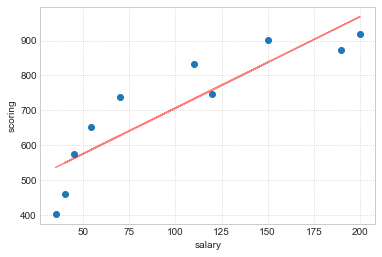

In [30]:
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring')
plt.grid(linestyle='dotted')

plt.show()

3. а) Посчитаем коэффициент детерминации $R^2$:
$$R^2 = \frac{D_model}{D_y}.$$

In [31]:
scoring_pred = b0 + b1 * salary
print('pred:', scoring_pred)
print('real:', scoring)

pred: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]
real: [401 574 874 919 459 739 653 902 746 832]


In [33]:
R2 = scoring_pred.var() / scoring.var()
print('R2 =', R2)

R2 = 0.7876386635293678


3. б) Найдём среднюю ошибку аппроксимации:
$$\overline{A} = \frac{1}{n} \sum_{i=1}^n \bigg|\frac{y_i - z_i}{y_i}\bigg|.$$

In [34]:
A = np.abs((scoring - scoring_pred) / scoring).mean()
print('A =', A)

A = 0.11469251843561709


4. Оценим построенное уравнение регрессии с помощью F-критерия Фишера:
$$T = \frac{R^2}{1 - R^2} \cdot \frac{n-k-1}{k} > F_{crit},$$
где:
* $R^2$ – коэффициент детерминации,
* $n$ – число наблюдений,
* $k$ – число факторов,
* $F_{crit}$ – критическое значение.

In [40]:
n = scoring.shape[0]
k1 = 1
k2 = n - k1 - 1
T = (R2 / (1 - R2)) * (k2 / k1)
print('T =', T)

T = 29.67164085966437


In [41]:
p = 0.95
alpha = 1 - p
F_crit = stats.f.ppf(1 - alpha, k1, k2)
print('F_crit =', F_crit)

F_crit = 5.317655071578714


Имеем $T > F_{crit}$, следовательно уравнение регрессии статистически значимо.

5. Построим для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

Для этого нам понадобится значение стандартной ошибки коэффициента наклона:
$$S_{slope} = \sqrt{\frac{\frac{1}{n-2}\sum_{i=1}^{n}(y_i - z_i)^2}{\sum_{i=1}^{n}(x_i - \overline{x})^2}},$$
где:
* $x$, $x_i$ – соответственно, все значения и конкретное значение фактора,
* $y_i$ – конкретное значение оцениваемой (целевой) переменной,
* $z_i$ – «предсказанное» значение, полученное с помощью модели регрессии,
* $n$ – число элементов в выборке.



In [43]:
upper = ((scoring - scoring_pred) ** 2).sum() / (n - 2)
lower = ((salary - salary.mean()) ** 2).sum()
S_slope = np.sqrt(upper / lower)
print('S_slope =', S_slope)

S_slope = 0.48108279568516005


In [47]:
t = stats.t.ppf(1 - alpha / 2, df=n-2)
print('t =', t)

t = 2.3060041350333704


Доверительный интервал для параметра $b_1$:

In [48]:
(b1 - t * S_slope , b1 + t * S_slope )

(1.5111599662593718, 3.729917798546158)

На основе имеющихся данных найдём стандартную ошибку коэффициента сдвига:
$$S_{intercept} = S_{slope} \sqrt{\frac{1}{n}\sum_{i=1}^{n}x_i^2}.$$

In [50]:
S_intercept = S_slope * np.sqrt((salary ** 2).mean())
print('S_intercept =', S_intercept)

S_intercept = 56.46649755068153


Доверительный интервал для параметра $b_0$:

In [51]:
(b0 - t * S_intercept, b0 + t * S_intercept)

(313.9653804816363, 574.3893341670829)

#### Задача 2

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?

In [75]:
scoring_msc = scoring[:5]
scoring_spb = scoring[5:]

In [76]:
scoring_msc.mean(), scoring_spb.mean()

(645.4, 774.4)

In [77]:
scoring.mean()

709.9

In [80]:
S2_F = 5 * (scoring_msc.mean() - scoring.mean()) ** 2 + 5 * (scoring_spb.mean() - scoring.mean()) ** 2

S2_res = ((scoring_msc - scoring_msc.mean()) ** 2).sum() + ((scoring_spb - scoring_spb.mean()) ** 2).sum()

S2_F, S2_res

(41602.5, 263086.39999999997)

Проверим найденные значения:

In [83]:
S2_F + S2_res == ((scoring - scoring.mean()) ** 2).sum()

False

In [84]:
k = 2
n = 10

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(41602.5, 32885.799999999996)

In [85]:
T = sigma2_F / sigma2_res
T

1.2650596914169643

In [86]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Видим, что $T<F_{crit}$, поэтому заключаем, что город проживания не является статистически значимым.

#### Задача 3

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

In [87]:
anscombe_dataset = pd.read_csv('anscombe_dataset.csv', index_col='id')
anscombe_dataset

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [88]:
def coeff(x1, y1):
    b1 = ((x1 * y1).mean() - x1.mean() * y1.mean()) / ((x1 ** 2).mean() - x1.mean() ** 2)
    b0 = y1.mean() - b1 * x1.mean()
    return b0, b1

In [98]:
for i in range(1, 5):
    print(f'i:', coeff(anscombe_dataset[f'x{i}'], anscombe_dataset[f'y{i}']))

i: (3.0000909090909245, 0.5000909090909076)
i: (3.0009090909090768, 0.5000000000000014)
i: (3.0024545454545555, 0.4997272727272716)
i: (3.0017272727272726, 0.49990909090909097)
